In [1]:
import torch
import torchvision
from torchvision import datasets,transforms,models
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F
from datetime import datetime
import torch.optim as optim
from torchsummary import summary


In [2]:
classes = ('Aloe_Vera','Amla','Ashoka','Ashwagandha','Bael','Cinnamon','Henna','Lavender','Marigold','Neem','Peppermint','Tulsi','Turmeric')

In [3]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layers = nn.Sequential(
            # conv1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),
            # conv2
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),
            # conv3
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
            # conv4
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2),
        )

        self.dense_layers = nn.Sequential(
            nn.Dropout(0.4),
            nn.Linear(50176, 1024),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(1024, 13),
        )

    def forward(self, X):
        out = self.conv_layers(X)

        # Flatten
        out = out.view(-1, 50176)

        # Fully connected
        out = self.dense_layers(out)

        return out

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    fig, ax = plt.subplots(figsize=(25, 25))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [4]:
transformer = transforms.Compose(
    [transforms.Resize(255), transforms.CenterCrop(224), transforms.ToTensor()]
)
model=CNN()
model.load_state_dict(torch.load("plant.pt"))
model.eval()

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

Open GUI

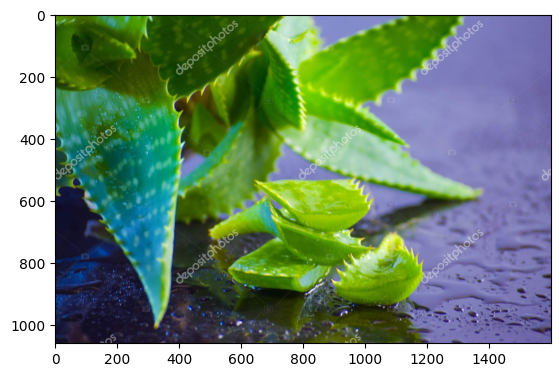

C:\Users\peris\AppData\Local\Temp\ipykernel_2404\2786072127.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probabilities = sm(outputs)


[[9.1072243e+01 8.5004549e+00 1.6446549e-01 2.1757218e-01 4.4498565e-03
  1.0079085e-02 1.0088422e-04 1.8798100e-05 6.1552427e-03 1.0545297e-06
  1.4426905e-07 5.6888226e-08 2.4460958e-02]]
Aloe_Vera       :    91.0722 %
Amla            :    8.5005 %
Ashoka          :    0.1645 %
Ashwagandha     :    0.2176 %
Bael            :    0.0044 %
Cinnamon        :    0.0101 %
Henna           :    0.0001 %
Lavender        :    0.0 %
Marigold        :    0.0062 %
Neem            :    0.0 %
Peppermint      :    0.0 %
Tulsi           :    0.0 %
Turmeric        :    0.0245 %


 Final Predicted image :  Aloe_Vera


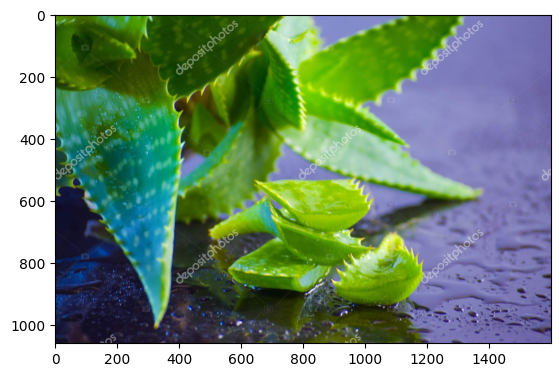

[[9.1072243e+01 8.5004549e+00 1.6446549e-01 2.1757218e-01 4.4498565e-03
  1.0079085e-02 1.0088422e-04 1.8798100e-05 6.1552427e-03 1.0545297e-06
  1.4426905e-07 5.6888226e-08 2.4460958e-02]]
Aloe_Vera       :    91.0722 %
Amla            :    8.5005 %
Ashoka          :    0.1645 %
Ashwagandha     :    0.2176 %
Bael            :    0.0044 %
Cinnamon        :    0.0101 %
Henna           :    0.0001 %
Lavender        :    0.0 %
Marigold        :    0.0062 %
Neem            :    0.0 %
Peppermint      :    0.0 %
Tulsi           :    0.0 %
Turmeric        :    0.0245 %


 Final Predicted image :  Aloe_Vera


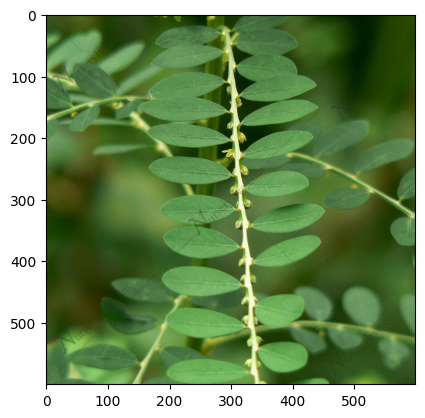

[[4.8525576e-02 9.2556587e+01 1.2053415e+00 3.2449433e-01 1.1765723e+00
  9.0279952e-02 2.8236603e-02 2.7057259e+00 1.6997987e+00 1.5857978e-01
  8.4529074e-06 9.1336238e-05 5.7679978e-03]]
Aloe_Vera       :    0.0485 %
Amla            :    92.5566 %
Ashoka          :    1.2053 %
Ashwagandha     :    0.3245 %
Bael            :    1.1766 %
Cinnamon        :    0.0903 %
Henna           :    0.0282 %
Lavender        :    2.7057 %
Marigold        :    1.6998 %
Neem            :    0.1586 %
Peppermint      :    0.0 %
Tulsi           :    0.0001 %
Turmeric        :    0.0058 %


 Final Predicted image :  Amla


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\peris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\PIL\Image.py", line 3240, in open
    fp.seek(0)
AttributeError: 'str' object has no attribute 'seek'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\peris\AppData\Local\Temp\ipykernel_2404\2786072127.py", line 100, in <lambda>
    b1 = tk.Button(win,text='Upload \nPhoto', width=20,command = lambda:upload_file())
  File "C:\Users\peris\AppData\Local\Temp\ipykernel_2404\2786072127.py", line 88, in upload_file
    img=Image.open(filename)
  File "C:\Users\peris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kf

In [5]:
import tkinter as tk
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from PIL import Image, ImageTk
from tkinter import *

import tkinter as tk

win = tk.Tk()
win.attributes("-fullscreen",True)

font = ('georgia', 22, 'bold')
title = Label(win, text='Herbal Plant Recognition')
title.config(bg='medium spring green', fg='dark goldenrod')
title.config(font=font)
title.config(height=3, width=120)
title.place(x=5, y=5)

font1 = ('times', 12, 'bold')
text = Text(win, height=20, width=80)

myscrollbar=Scrollbar(text)
text.configure(yscrollcommand=myscrollbar.set)
text.place(x=50, y=120)
text.config(font=font1)

font = ('black', 10, 'bold')
Imagetext = Label(win, text='IMAGE DISPLAY')
Imagetext.config(bg='white', fg='dark goldenrod')
Imagetext.config(font=font)
Imagetext.config(height=3, width=20)
Imagetext.place(x=1000, y=530)

font = ('black', 10, 'bold')
Imagetext2 = Label(win, text='**** PREDICTION ****')
Imagetext2.config(bg='white', fg='dark goldenrod')
Imagetext2.config(font=font)
Imagetext2.config(height=3, width=20)
Imagetext2.place(x=1320, y=120)

font1 = ('times',15, 'bold')
predict = Text(win, height=3, width=20)
predict.place(x=1320, y=200)
predict.config(font=font1)


frame = Frame(win, width=500, height=400, bg="lightblue", colormap="new")
frame.pack()
frame.place(x=800, y=120)

from PIL import Image
from torch.autograd import Variable
import matplotlib.image as mpimg

def get_probabilities(image):
  imgplot = plt.imshow(image)
  plt.show()
  image = transformer(image)
  image = image.float()
  image = Variable(image, requires_grad=True)
  image = image.unsqueeze(0)
  outputs = model(image)
  _, predicted = torch.max(outputs.data, 1)
  sm = torch.nn.Softmax()
  probabilities = sm(outputs) 
  probabilities = probabilities.detach().numpy()
  print(probabilities*100) #Converted to probabilities
  text.delete('1.0', END)
  predict.delete('1.0',END)
  if probabilities.max()*100 >= 50:
      predict.insert(END, (predicted_plant:=classes[predicted.tolist()[0]]).upper())
  else:
      predict.insert(END, predicted_plant:='UNKNOWN PLANT')
  for i,j in enumerate(probabilities[0]):
    str_display = classes[i].ljust(15, ' ')  + ':   ' +  str(round(j*100,4)) + '%\n'
    text.insert(END, str_display)
    print(classes[i].ljust(15, ' ') ,':   ', round(j*100,4),'%')
  print('\n\n Final Predicted image : ', predicted_plant)



def upload_file():
    global img
    for widget in frame.winfo_children():
        widget.destroy()
    f_types = [('Jpg Files', '*.jpg')]
    filename = filedialog.askopenfilename(filetypes=f_types)
    img=Image.open(filename)
    image2= img
    get_probabilities(img)
    img_resized=img.resize((500,400)) # new width & height
    img=ImageTk.PhotoImage(img_resized)
    label = Label(frame, image = img)
    label.pack()


def close():
   win.destroy()

b1 = tk.Button(win,text='Upload \nPhoto', width=20,command = lambda:upload_file())
b1.config(font=('times', 12, 'bold'))
b1.place(x=1000, y=600)

font = ('black', 10, 'bold')
probabilities = Label(win, text='Probabilities of each class')
probabilities.config(bg='white', fg='dark goldenrod')
probabilities.config(font=('times', 12, 'bold'))
probabilities.config(height=3, width=20)
probabilities.place(x=300, y=600)

exitButton = Button(win, text="Exit", command=close)
exitButton.place(x=1200, y=600)
exitButton.config(font=('times', 12, 'bold'))


credit = Label(win, text="Prepared by:\nPeris Raj KC\nPrabhas Gyawali")
credit.config(bg='white', fg='black',font=font, justify='left')
credit.place(relx=1.0, rely=1.0, anchor='se')

win.mainloop()  # Keep the window open